## Time Series Data Analysis using RNN

In [38]:
# in this code block we gather all imports

# to read CSV and for use with the library ppscore
import pandas as pd
from pandas.api.types import CategoricalDtype

# for use with sklearn and for EDA
import numpy as np

# Data Split
from sklearn.model_selection import train_test_split

# Normalization and Standardization
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Plots
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

# EDA
import ppscore as pps
from scipy import stats

# PCA
from sklearn.decomposition import PCA

# Tensors and Artificial Neural Networks
import torch
import torch.nn as nn



In [39]:
# in this code block we determine the device to use depending on GPU availability

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('This Computation is running on {}.'.format(device))

This Computation is running on cpu.


(2, 1000)
[[  71.   72.   73. ... 1068. 1069. 1070.]
 [  56.   57.   58. ... 1053. 1054. 1055.]]
(2, 1000)
[[-0.39714813 -0.44252035 -0.48678672 ...  0.00707353 -0.04291247
  -0.09279121]
 [ 0.3349882   0.2874781   0.23924923 ...  0.6867973   0.6496123
   0.6108036 ]]


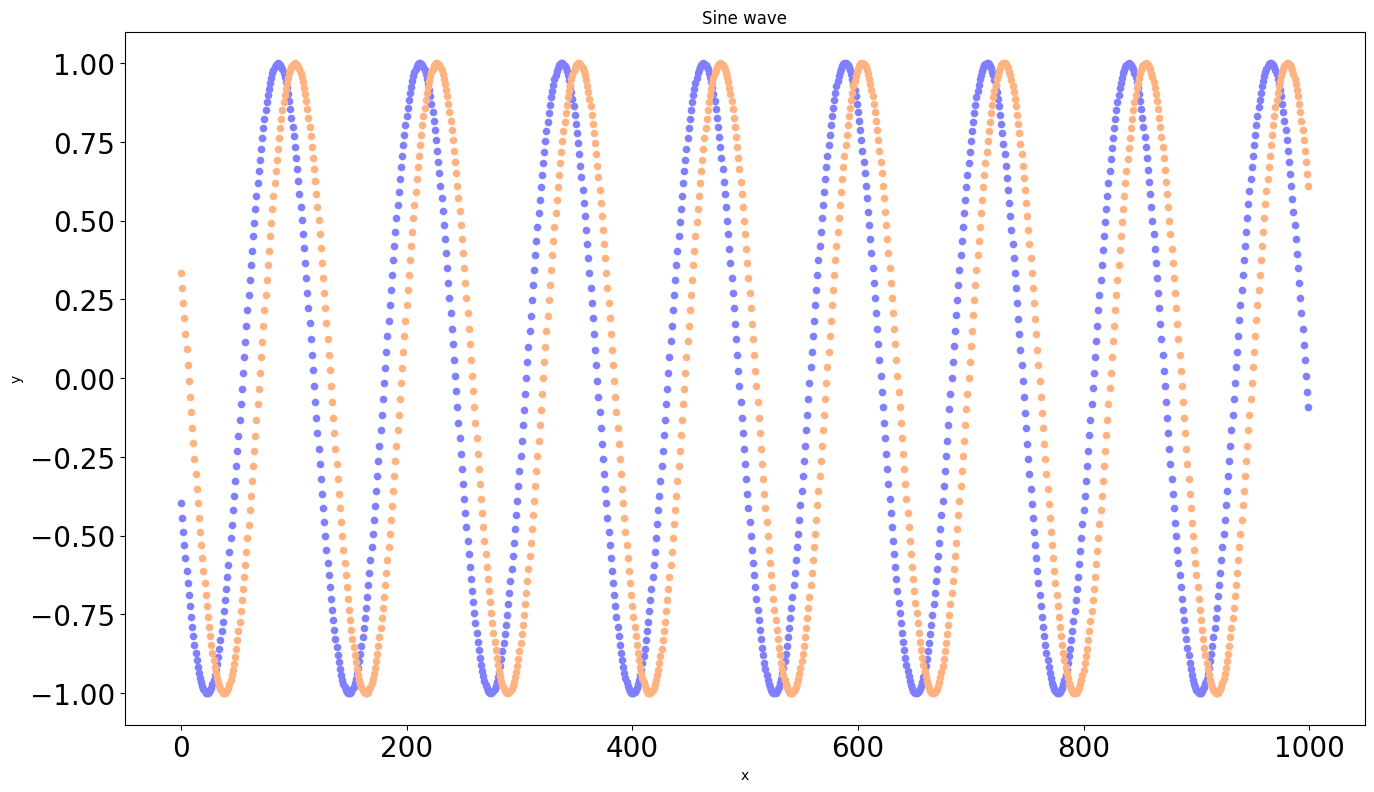

In [40]:
# in this code block we generate a series bases on the sinus function

def create_example_sinus_time_series():
    # number of samples i.e. number of sine waves
    n = 2
    # number of values per sample i.e. per sine wave
    l = 1000
    # parameter that governs the width of the sine wave
    t = 20
    
    # create some input for the sine function
    x = np.empty((n, l), np.float32)
    x[:] = np.array(range(l)) + np.random.randint(-4*t, 4*t, n).reshape(n, 1)

    print(x.shape)
    print(x)

    # get the corresponding sine values
    y = np.sin(x/1.0/t).astype(np.float32)

    print(y.shape)
    print(y)

    # plot of the first sine wave n = 1 and second sine wave n = 2
    plt.figure(figsize=(16,9))
    plt.title("Sine wave")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.plot(np.arange(x.shape[1]), y[0,:], linestyle='',marker='.',markersize=11.,markerfacecolor='#8080ff',markeredgewidth=.0)
    plt.plot(np.arange(x.shape[1]), y[1,:], linestyle='',marker='.',markersize=11.,markerfacecolor='#ffb380',markeredgewidth=.0)
    plt.show()

create_example_sinus_time_series()